1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

**Import some important libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Load Dataset

**Import the data into dataframe. Then, show histogram of dataframe.**

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   46    1   0       120   249    0        0      144      0      0.8      2   
1   71    0   1       160   302    0        1      162      0      0.4      2   
2   71    0   1       160   303    0        1      163      0      0.4      2   
3   71    0   1       160   304    0        1      164      0      0.4      2   
4   71    0   1       160   305    0        1      165      0      0.4      2   

   ca  thal  target  
0   0     3       0  
1   2     2       1  
2   2     2       1  
3   2     2       1  
4   2     2       1  


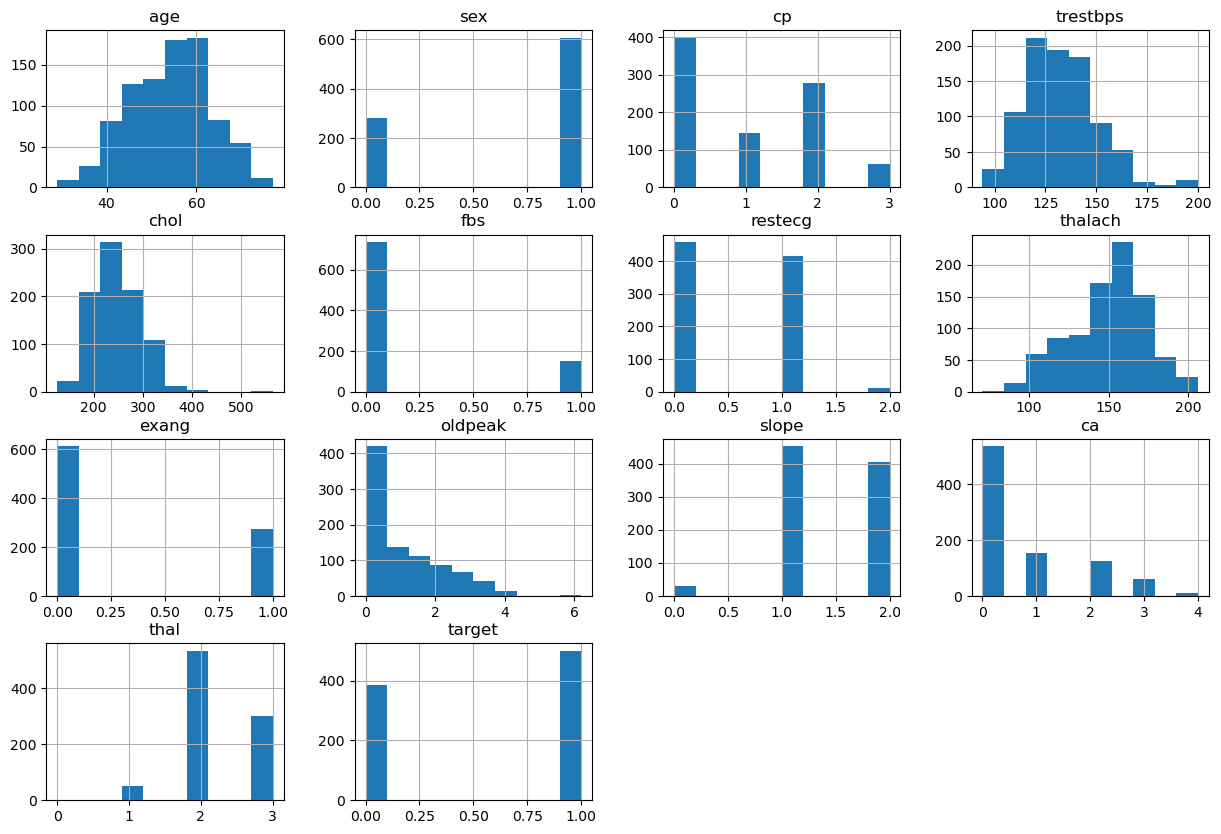

In [2]:
import pandas as pd
PATH = "heart.csv" # Path to your file
df = pd.read_csv(PATH)
print(df.head())

#ToDo: Show histogram of dataframe
df.hist(figsize=(15, 10), grid = True)
plt.show()

## Data Analysis

In [3]:
# Data analysis
# Todo: analyze your data here

**Display information about dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


* There are no missing values.

**Display descriptive statistics of the datafame.**

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Show the charts that represent the Count of the Target distribution and the Gender distribution.**

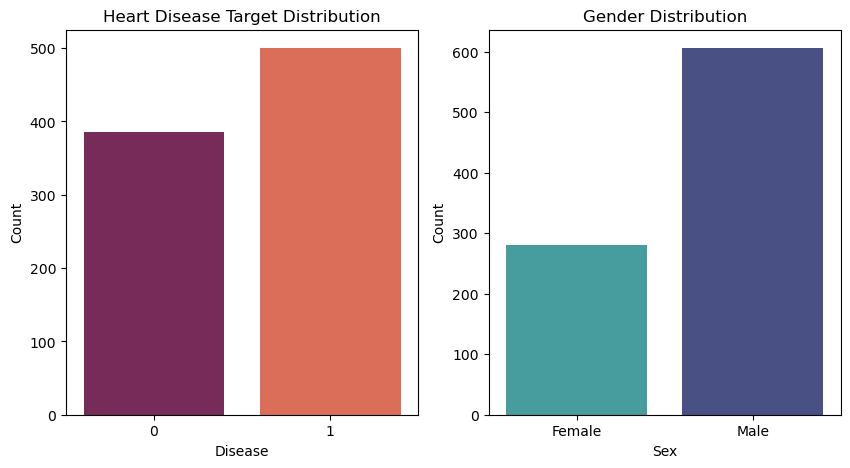

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First subplot
sns.countplot(x='target', data=df, palette="rocket", ax=axs[0])
axs[0].set_xlabel("Disease")
axs[0].set_ylabel("Count")
axs[0].set_title("Heart Disease Target Distribution")

# Second subplot
label_gender = ['Female', 'Male']
sns.countplot(x='sex', data=df, palette="mako_r", ax=axs[1])
axs[1].set_xlabel("Sex")
axs[1].set_ylabel("Count")
axs[1].set_xticklabels(label_gender, rotation=0)
axs[1].set_title("Gender Distribution")

plt.show()

* The difference is acceptable and does not significantly affect the model.

**Show the charts that represent the Frequency of Heart Disease for Ages and Chest Pain Type.**

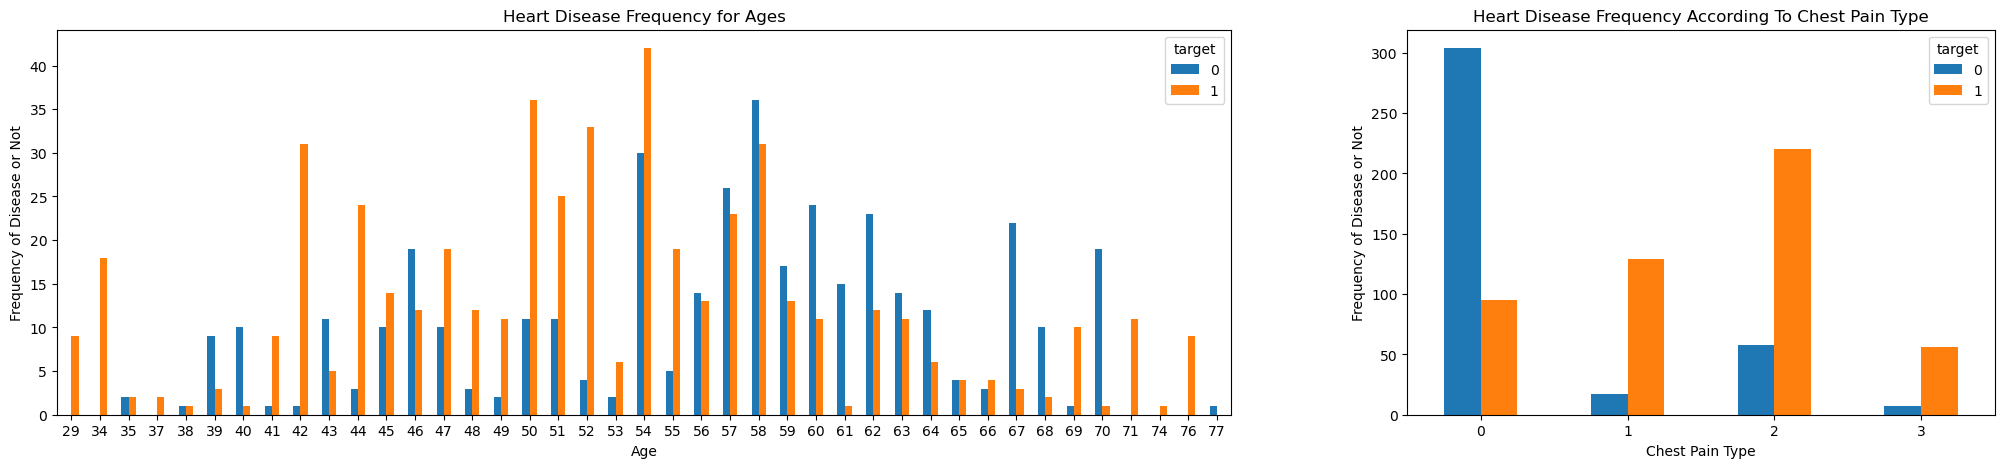

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 5), gridspec_kw={'width_ratios': [2, 1]})

# First subplot
age_order = sorted(df.age.unique())
pd.crosstab(df.age, df.target).plot(kind="bar", ax=axs[0])
axs[0].set_title('Heart Disease Frequency for Ages')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency of Disease or Not')
axs[0].set_xticklabels(age_order, rotation=0)

# Second subplot
pd.crosstab(df.cp, df.target).plot(kind="bar", ax=axs[1])
axs[1].set_title('Heart Disease Frequency According To Chest Pain Type')
axs[1].set_xlabel('Chest Pain Type')
axs[1].set_ylabel('Frequency of Disease or Not')
axs[1].set_xticklabels(df.cp.unique(), rotation=0)

plt.show()

* **Show the chart that represents the Distribution of Heart Disease based on Fasting Blood Sugar.**

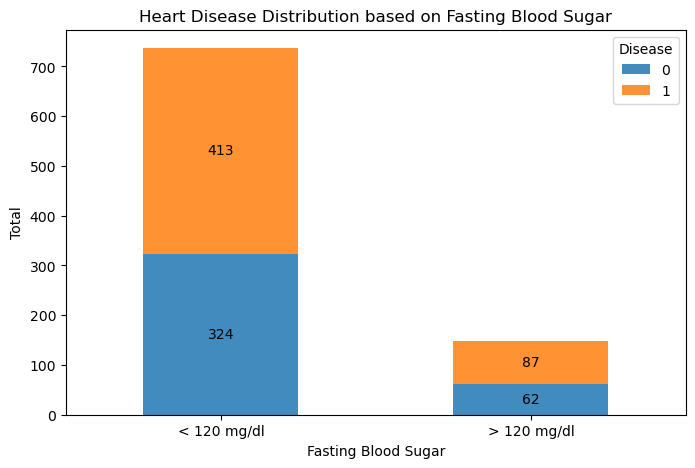

In [8]:
label_dis = np.array([0, 1])
label_fbs = ['< 120 mg/dl', '> 120 mg/dl']

ax = pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8, 5), 
                                         stacked=True,
                                         alpha=0.85)

for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.title('Heart Disease Distribution based on Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
plt.xticks(label_dis, label_fbs, rotation=0)
plt.legend(title='Disease', loc='upper right')
plt.show()

* Patients with low fasting blood sugar have a higher probability of heart disease compared to those with high fasting blood sugar.

**Show the charts that represent the relationship between pairs of numeric variables in a dataset.**

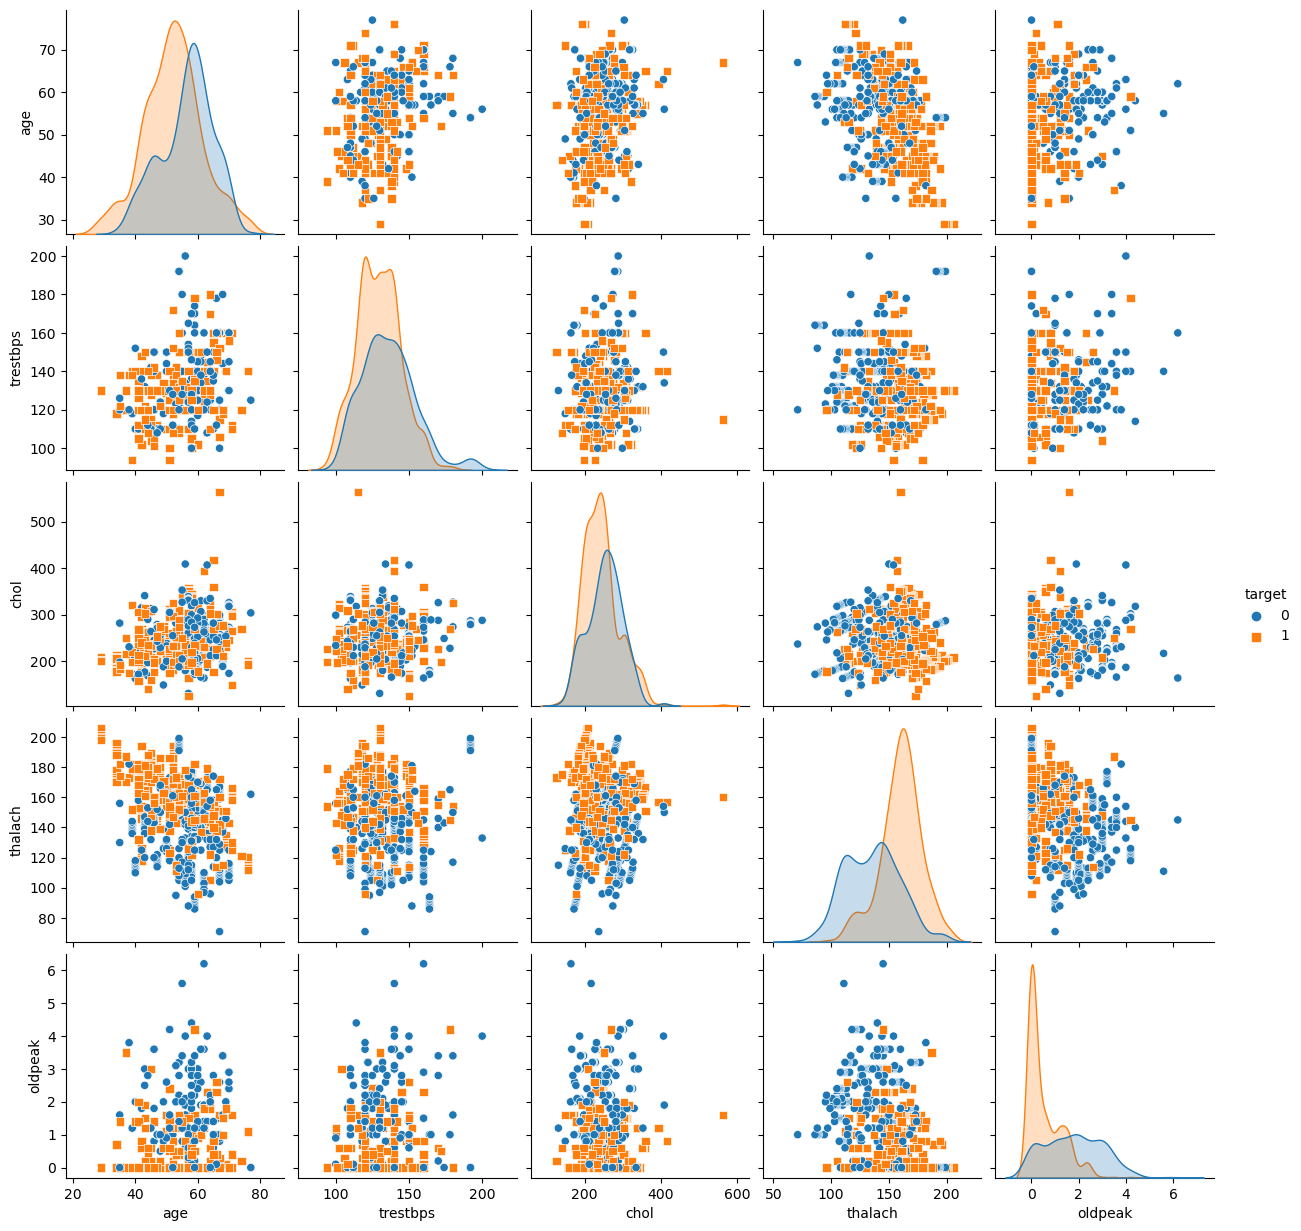

In [9]:
sns.pairplot(df, hue = 'target', markers=["o", "s"], vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.show()

## Preprocessing

In [10]:
def find_outliers(df, outlier, threshold=4):
    for column in df.columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers = df[z_scores > threshold]
        if not outliers.empty:
            print(f"Outliers in column '{column}':")
            for index, value in outliers[column].items():
                print(f" - Index: {index}, Value: {value}")
                outlier.append(index)
    return outlier

In [11]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    outlier = []
    find_outliers(df, outlier)
    df = df.drop(outlier, axis=0)
    
    return df

In [12]:
df = preprocessing_data(df.copy())

Outliers in column 'trestbps':
 - Index: 767, Value: 200
Outliers in column 'chol':
 - Index: 755, Value: 564
Outliers in column 'oldpeak':
 - Index: 703, Value: 6.2


In [13]:
cat_features = ["sex", "cp", "fbs", "restecg", "ca", "exang", "slope", "thal"]

## Feature Engineering

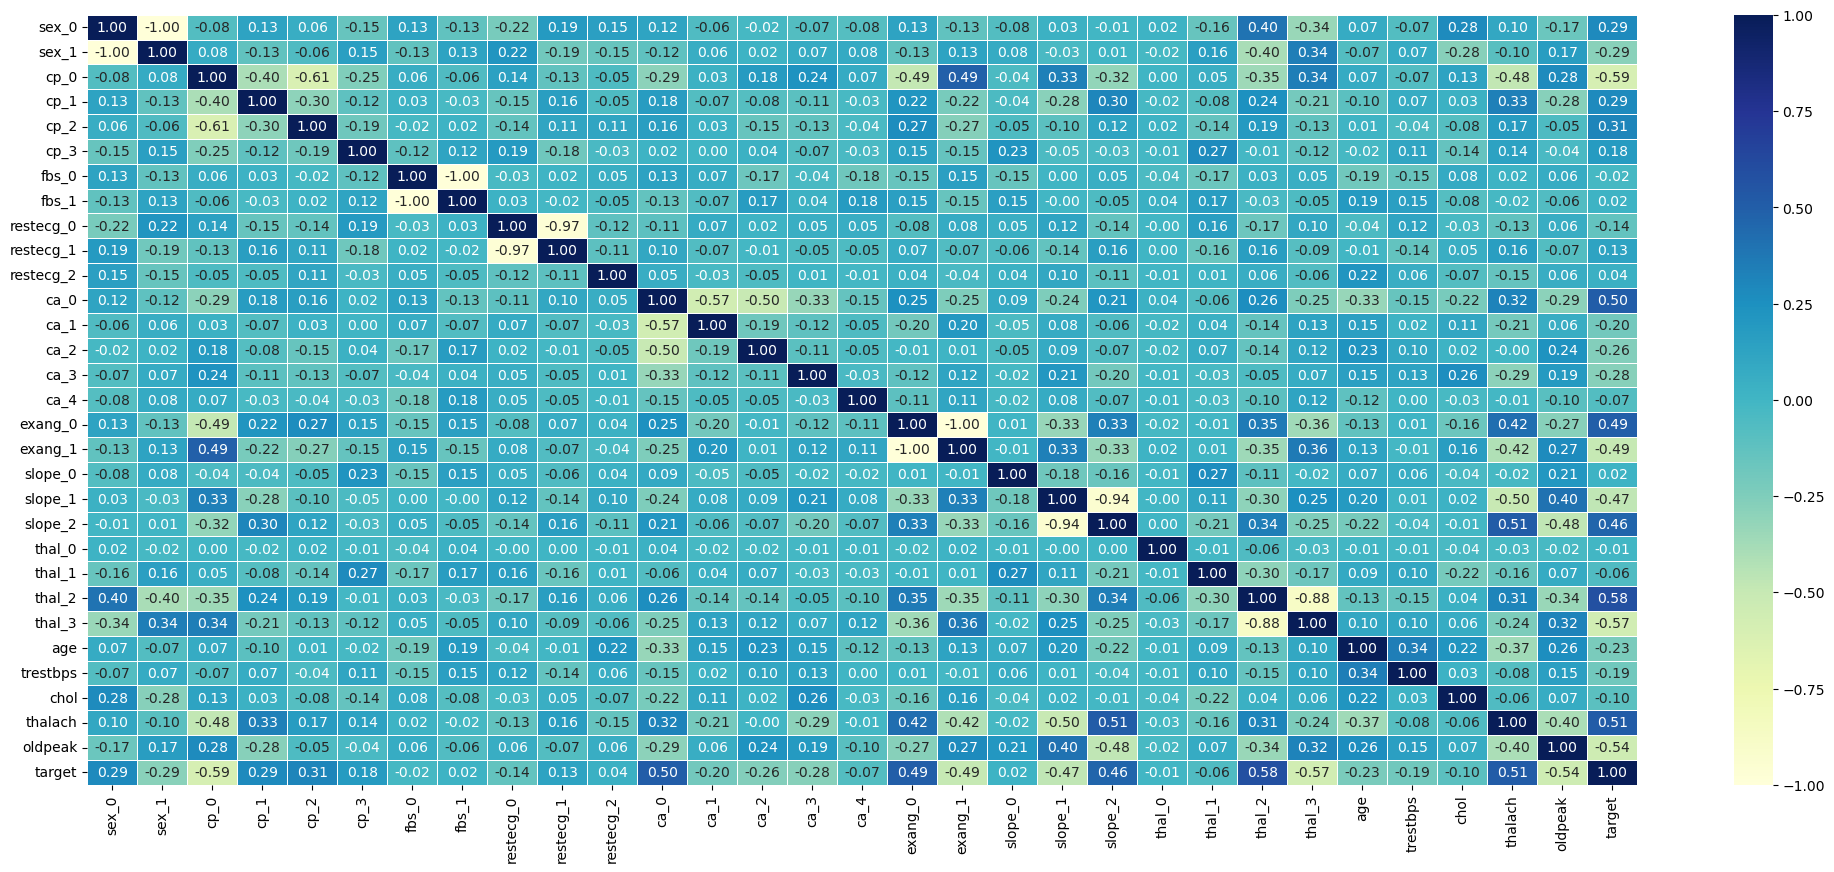

In [14]:
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df[cat_features] = df[cat_features].astype("category")
    df_temp = df.copy().drop(columns=cat_features)
    df = pd.get_dummies(df.loc[:, cat_features])
    df = pd.concat([df, df_temp], axis=1)
    
    return df

df = apply_feature_engineering(df)

# Heatmap
# Show heatmap after normalized data
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f",cmap="YlGnBu")

* "ca", "exang", "slope", "thal", "thalach" are features correlating strongly to the target.

In [15]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    # Todo: Select features
    # Todo: Select label
    
    X = df.drop("target", axis=1) 
    y = df["target"]              
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [16]:
RANDOM_STATE = 2000   
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [17]:
import warnings
warnings.filterwarnings('ignore')

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    # Todo: Input your scaler and logistic model into pipeline
    # Todo: fit your model with X, y
    
    scaler = StandardScaler()
    logistic = LogisticRegression()
    model = make_pipeline(scaler, logistic)
    param_grid = {'logisticregression__penalty': ['l1', 'l2'],
                  'logisticregression__C': [0.1, 1, 10],
                  'logisticregression__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag']}

    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
    grid_search.fit(X, y)
    
    return grid_search.best_estimator_

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    # Todo: Only choose one of them as your score for the question 7
    
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred))
    print("Recall: ", recall_score(y_true , y_pred))
    print("F1: ", f1_score(y_true , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))

    return f1_score(y_true , y_pred)

model = build_model(trainX, trainY)
print(model)
# Compare on training dataset
pred = model.predict(trainX)
print("\nTRAINING SCORE:")
calculate_performance(trainY, pred)

pred = model.predict(testX)
print("\nTESTING SCORE:")
calculate_performance(testY, pred)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

TRAINING SCORE:
Accuracy:  0.9530744336569579
Precision:  0.9518413597733711
Recall:  0.9655172413793104
F1:  0.9586305278174038
Confusion matrix: 
 [[253  17]
 [ 12 336]]

TESTING SCORE:
Accuracy:  0.9735849056603774
Precision:  0.9736842105263158
Recall:  0.9801324503311258
F1:  0.976897689768977
Confusion matrix: 
 [[110   4]
 [  3 148]]


0.976897689768977

In [18]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    "7. ..." \
           "Other conclusion: "
    
    print("TESTING SCORE:")
    print("F1 score on testing set:", calculate_performance(testY, pred))
    return 
get_conclusion()

TESTING SCORE:
Accuracy:  0.9735849056603774
Precision:  0.9736842105263158
Recall:  0.9801324503311258
F1:  0.976897689768977
Confusion matrix: 
 [[110   4]
 [  3 148]]
F1 score on testing set: 0.976897689768977


* F1 is my main metric because it allows the model's ability to detect both the individuals who have heart disease and those who do not have heart disease by ensuring the balance between precision and recall. The consequences of false negatives (FN) (when a patient has the disease but is predicted not to have it) can be extremely serious. Similarly, false positives (FP) (when a patient does not have the disease but is predicted to have it) can lead to inappropriate treatment, which can adversely affect the patient's heart and overall health.

* The best hyperparameters found using GridSearchCV. In this context, C='1' indicates moderate regularization. In addition, 'l1' regularization was found to be useful for feature selection, as it shrinks less important coefficients to zero, thereby identifying and excluding irrelevant or redundant features. Finally, the 'liblinear' solver is designed to handle small datasets, which makes it an appropriate choice for the size of the dataset being used in this case.
* In short, 3 hyperparameters above is appropriate for this particular dataset context.

* Additionally, the model's performance on the testing set is almost as good as its performance on the training set, which suggests that the model is not overfitting to the training set.
* Overall, the model performed well on both the training and testing datasets, with high accuracy, precision, recall, and F1-score rates.